**Projeto Estatística 2 - Parte 1**

Importando bibliotecas

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Importando base de dados

In [5]:
df = pd.read_csv('./cancer_EUA.csv', sep=';', decimal=',')
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0        890.770529             164.9          489.8    61898.0   
1        173.0        669.088363             161.3          411.6    48127.0   
2        102.0        744.083462             174.7          349.7    49348.0   
3        427.0        953.773339             194.8          430.4    44243.0   
4         57.0        646.194438             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0    260131.0            11.2   499.748204   (61494.5, 125635]       39.3   
1     43269.0            18.6    23.111234  (48021.6, 51046.4]       33.0   
2     21026.0            14.6    47.560164  (48021.6, 51046.4]       45.0   
3     75882.0            17.1   342.637253    (42724.4, 45201]       42.8   
4     10321.0            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

1) Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.)

2) Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [8]:
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [9]:
nulos = df.isnull().sum()
nulos

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [10]:
nulos_pct = nulos/df.shape[0]
nulos_pct

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
TARGET_deathRate           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0

In [11]:
nulos_pct[nulos_pct>0.5]

PctSomeCol18_24    0.749918
dtype: float64

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

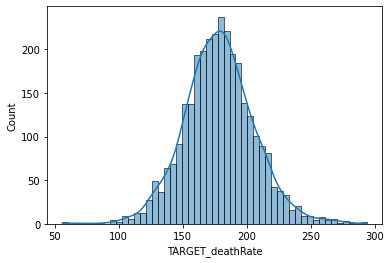

In [14]:
# dê uma olhada na distribuição dos preços "SalePrice"
sns.histplot(data=df, x="TARGET_deathRate", kde=True)

In [15]:
df["TARGET_deathRate"].skew()

0.12931340277335948

In [16]:
correlacao = df.corr(method='spearman')
correlacao

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000         -0.087692         -0.085583   
avgDeathsPerYear           -0.087692          1.000000          0.672511   
TARGET_deathRate           -0.085583          0.672511          1.000000   
incidenceRate               0.264905          0.274470          0.407906   
medIncome                   0.346061         -0.328660         -0.463858   
popEst2015                  0.810315         -0.043376         -0.044447   
povertyPercent             -0.195880          0.327645          0.442435   
studyPerCap                 0.508170         -0.087545         -0.112687   
MedianAge                  -0.239157         -0.006874          0.008589   
MedianAgeMale              -0.244608         -0.011604         -0.004532   
MedianAgeFemale            -0.258758          0.003867          0.019903   
AvgHouseholdSize            0.118222          0.024783          0.013300   
PercentMarried             -0.172258         -0.184165         -0.257257   
PctNoHS18_24               -0.296569          0.071910          0.124543   
PctHS18_24                 -0.235587          0.197543          0.275896   
PctSomeCol18_24             0.330782         -0.147881         -0.212383   
PctBachDeg18_24             0.381605         -0.184054         -0.270316   
PctHS25_Over               -0.347638          0.277944          0.420579   
PctBachDeg25_Over           0.392733         -0.347502         -0.501730   
PctEmployed16_Over          0.259640         -0.307593         -0.433174   
PctUnemployed16_Over        0.073620          0.284581          0.402940   
PctPrivateCoverage          0.269957         -0.301268         -0.411319   
PctPrivateCoverageAlone     0.327338         -0.265507         -0.380840   
PctEmpPrivCoverage          0.391781         -0.199474         -0.277938   
PctPublicCoverage          -0.250184          0.278845          0.402365   
PctPublicCoverageAlone     -0.153674          0.322418          0.453102   
PctWhite                   -0.182280         -0.093744         -0.101955   
PctBlack                    0.256661          0.196736          0.251542   
PctAsian                    0.561944         -0.151574         -0.207830   
PctOtherRace                0.242279         -0.120319         -0.216924   
PctMarriedHouseholds       -0.118769         -0.193525         -0.279620   
BirthRate                  -0.071837         -0.059738         -0.050487   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.264905   0.346061    0.810315       -0.195880   
avgDeathsPerYear              0.274470  -0.328660   -0.043376        0.327645   
TARGET_deathRate              0.407906  -0.463858   -0.044447        0.442435   
incidenceRate                 1.000000   0.010581    0.186183        0.010033   
medIncome                     0.010581   1.000000    0.309171       -0.884297   
popEst2015                    0.186183   0.309171    1.000000       -0.083300   
povertyPercent                0.010033  -0.884297   -0.083300        1.000000   
studyPerCap                   0.162131   0.257010    0.562972       -0.125192   
MedianAge                     0.016922  -0.115359   -0.408627       -0.149297   
MedianAgeMale                 0.008706  -0.088881   -0.413663       -0.176155   
MedianAgeFemale               0.003489  -0.160013   -0.431936       -0.103869   
AvgHouseholdSize             -0.084246   0.104335    0.295149        0.088690   
PercentMarried               -0.115636   0.375900   -0.322732       -0.598271   
PctNoHS18_24                 -0.142784  -0.322642   -0.306822        0.285646   
PctHS18_24                    0.020066  -0.199432   -0.209124        0.113834   
PctSomeCol18_24               0.018900   0.274998    0.329147       -0.197924   
PctBachDeg18_24               0.103372   0.474073    0.349674       -0.430431   
PctHS25_Over                  0.128990  -0.392909   -0.380

In [17]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlacao)

<AxesSubplot:>

In [18]:
correlacao['TARGET_deathRate']

avgAnnCount               -0.085583
avgDeathsPerYear           0.672511
TARGET_deathRate           1.000000
incidenceRate              0.407906
medIncome                 -0.463858
popEst2015                -0.044447
povertyPercent             0.442435
studyPerCap               -0.112687
MedianAge                  0.008589
MedianAgeMale             -0.004532
MedianAgeFemale            0.019903
AvgHouseholdSize           0.013300
PercentMarried            -0.257257
PctNoHS18_24               0.124543
PctHS18_24                 0.275896
PctSomeCol18_24           -0.212383
PctBachDeg18_24           -0.270316
PctHS25_Over               0.420579
PctBachDeg25_Over         -0.501730
PctEmployed16_Over        -0.433174
PctUnemployed16_Over       0.402940
PctPrivateCoverage        -0.411319
PctPrivateCoverageAlone   -0.380840
PctEmpPrivCoverage        -0.277938
PctPublicCoverage          0.402365
PctPublicCoverageAlone     0.453102
PctWhite                  -0.101955
PctBlack                   0

In [21]:
# veja quais são as variáveis mais correlacionadas com o target!
corr_y = correlacao['TARGET_deathRate'].abs().sort_values(ascending=False)
corr_y

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

In [22]:
corr_y[corr_y>0.6].index

Index(['TARGET_deathRate', 'avgDeathsPerYear'], dtype='object')

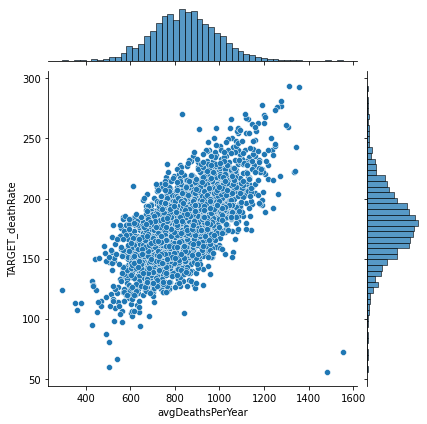

In [23]:
sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

In [24]:
df[df['avgDeathsPerYear']>1400]['avgDeathsPerYear']

1220    1553.351487
1489    1483.055135
Name: avgDeathsPerYear, dtype: float64

In [27]:
# identifique e remova os outliers
df = df[~(df['avgDeathsPerYear']>1400)]

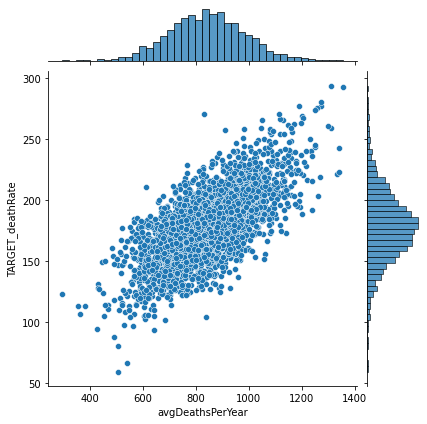

In [28]:
# faça o scatterplot novamente para verificar se os outliers sumiram
sns.jointplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

3) Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [31]:
# media
print(f'A média do target é: {df.TARGET_deathRate.mean()} ')

A média do target é: 178.56620689655176 


In [33]:
# mediana
print(f'A mediana do target é: {df.TARGET_deathRate.median()} ')

A mediana do target é: 178.1 


In [34]:
# variância
print(f'A média do target é: {np.var(df.TARGET_deathRate)} ')

A média do target é: 754.9990320819886 


3.2) Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

Intercepto: 62.71553899101863
Coeficienter angular: [0.13732128]

####################################################



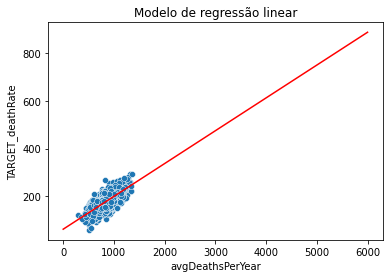


####################################################



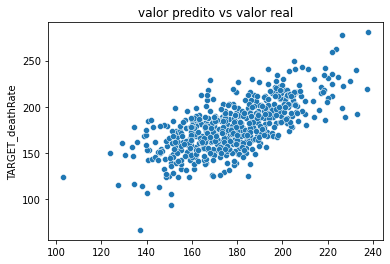

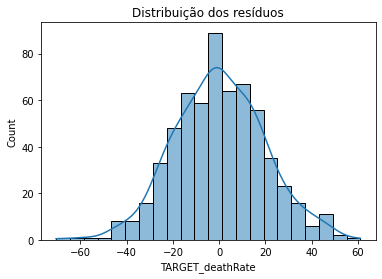


####################################################


Métricas de avaliação:

R^2: 0.46799819149288
MAE: 15.434911353896473
MSE: 381.0586034891743
RMSE: 19.520722412072107


In [74]:
X = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

# 1) Importar
from sklearn.linear_model import LinearRegression

# 2) Instanciar
estimador = LinearRegression()

# 3) Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Treinamento
modelo = estimador.fit(np.array(X_treino).reshape(-1, 1), y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")

x = np.linspace(0, 6000, 100000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

# 5) Teste
predictions = modelo.predict(np.array(X_teste).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred,squared=False))

4) Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

In [86]:
X = df.drop(columns=['TARGET_deathRate','PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone', 'binnedInc','Geography'])
y = df['TARGET_deathRate']

Intercepto: 78.6791857998404
Coeficientes angulares: [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]

####################################################



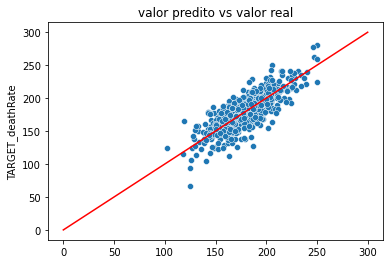

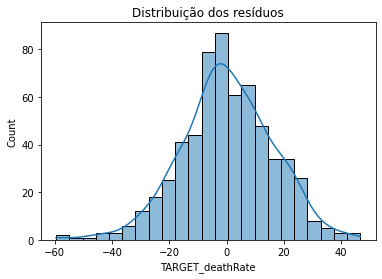


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.6400611996862204
MAE: 12.527494676659867
MSE: 257.81449310111134
RMSE: 16.05660278829589


In [88]:
# Etapas da modelagem

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes angulares:",modelo.coef_ )

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)


plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0,300), np.linspace(0, 300), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

Intercepto: 121.39040548563041
Coeficientes angulares: [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]

####################################################



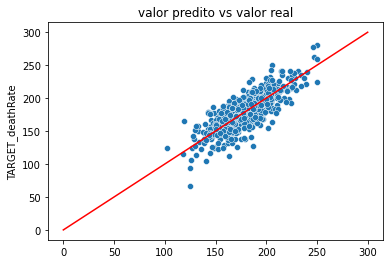

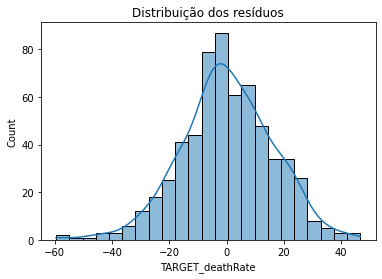


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.640061199686155
MAE: 12.52749467666093
MSE: 257.8144931011582
RMSE: 16.056602788297347


In [89]:
# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# NOVO: aplicando o scaler!! - usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

X_treino = mms.fit_transform(X_treino)
X_teste = mms.transform(X_teste)


# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 300), np.linspace(0, 300), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))